<a href="https://colab.research.google.com/github/shivamarora1209/BasicHTMLProject/blob/main/Implementation_Of_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Implementation of Principal Component Analysis**

##Import required Libraries and dataset

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

In [ ]:
iris_dataset = load_iris()
df = pd.DataFrame(iris_dataset.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
df['species'] = iris_dataset.target
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


###Lets analyse the dataset

In [ ]:
#Calculating Percentage Of Missing Data
print(df.isnull().mean()*100),
#There is no missing data in any of the columns

print()

#Lets calculate number of examples of each class
print(df['species'].value_counts())
#There are 50 examples of each class, therefore dataset is balanced

sepal_length    0.0
sepal_width     0.0
petal_length    0.0
petal_width     0.0
species         0.0
dtype: float64

species
0    50
1    50
2    50
Name: count, dtype: int64


###Lets Plot Covariance Matrix

              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000



<Axes: >

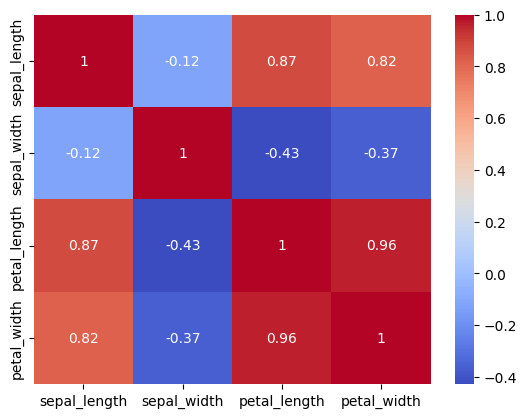

In [ ]:
print(df.iloc[:, :4].corr())
print()
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')

We can see here that there is a presence of corelated features. Lets implement PCA to reduce the dimentionality of the dataset

##**Implementing** Principal Component Analysis on the correlated columns


Applying Normalisation on the dataset

In [ ]:
Standard_scaler = StandardScaler()
X_scaled = Standard_scaler.fit_transform(X)

In [ ]:
print("Mean of scaled data:", np.mean(X_scaled, axis=0))

Mean of scaled data: [-1.69031455e-15 -1.84297022e-15 -1.69864123e-15 -1.40924309e-15]


Mean is almost equal to 0 (Mean-centered)

In [ ]:
X_scaled = tf.constant(X_scaled)

In [ ]:
X_scaled.shape

TensorShape([150, 4])

In [ ]:
X_scaled_Transpose = tf.transpose(X_scaled)

In [ ]:
X_scaled_Transpose.shape

TensorShape([4, 150])

Calculating Covariance Matrix

In [ ]:
cov_matrix = tf.matmul(X_scaled_Transpose, X_scaled)/(X_scaled.shape[0]-1)

In [ ]:
cov_matrix

<tf.Tensor: shape=(4, 4), dtype=float64, numpy=
array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])>

In [ ]:
eigen_values, eigen_vectors = tf.linalg.eigh(cov_matrix)

Here we have the eigen values and corresponding eigen vectors. We can clearly see that last two vectors capture max variance as per the value of explained variance value.

In [ ]:
eigen_values, eigen_vectors

(<tf.Tensor: shape=(4,), dtype=float64, numpy=array([0.02085386, 0.14774182, 0.9201649 , 2.93808505])>,
 <tf.Tensor: shape=(4, 4), dtype=float64, numpy=
 array([[ 0.26128628,  0.71956635,  0.37741762,  0.52106591],
        [-0.12350962, -0.24438178,  0.92329566, -0.26934744],
        [-0.80144925, -0.14212637,  0.02449161,  0.5804131 ],
        [ 0.52359713, -0.63427274,  0.06694199,  0.56485654]])>)

In [ ]:
explained_variance_ratio = []
for value in eigen_values.numpy():
  explained_variance_ratio.append((value/sum(eigen_values)))

In [ ]:
explained_variance_ratio

[<tf.Tensor: shape=(), dtype=float64, numpy=0.005178709107154855>,
 <tf.Tensor: shape=(), dtype=float64, numpy=0.03668921889282869>,
 <tf.Tensor: shape=(), dtype=float64, numpy=0.22850761786701757>,
 <tf.Tensor: shape=(), dtype=float64, numpy=0.7296244541329988>]

We can see that last two values are maximum explained vairance ratio, we will be using the eigen vectors corresponding to them.

In [ ]:
#Column of eigen_vectors tensor represents a eigen_vector
#Check Tensorflow documentation
PC1 = eigen_vectors[:, -1]
PC2 = eigen_vectors[:, -2]
PC1, PC2

(<tf.Tensor: shape=(4,), dtype=float64, numpy=array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654])>,
 <tf.Tensor: shape=(4,), dtype=float64, numpy=array([0.37741762, 0.92329566, 0.02449161, 0.06694199])>)

In [ ]:
col1  = tf.matmul(X_scaled, tf.expand_dims(PC1, axis=-1))
col2  = tf.matmul(X_scaled, tf.expand_dims(PC2, axis=-1))

In [ ]:
new_df = pd.DataFrame({
    'PC1': col1.numpy().flatten(),
    'PC2': col2.numpy().flatten(),
})

new_df['species'] = df.iloc[:, 4]

In [ ]:
new_df

,PC1,PC2,species
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0
...,...,...,...
145,1.870503,0.386966,2
146,1.564580,-0.896687,2
147,1.521170,0.269069,2
148,1.372788,1.011254,2


<Axes: >

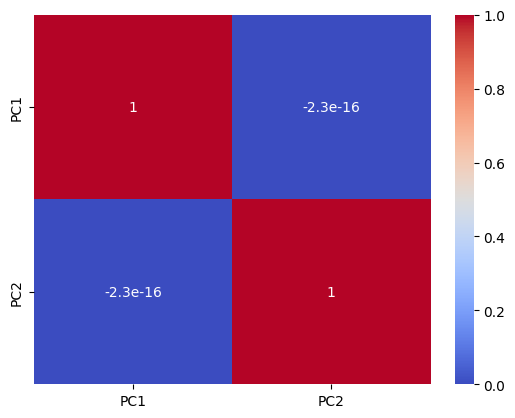

In [ ]:
X_PC = new_df.drop('species', axis=1)
y_PC = new_df['species']
sns.heatmap(X_PC.corr(), annot=True, cmap='coolwarm')

<Axes: xlabel='PC1', ylabel='PC2'>

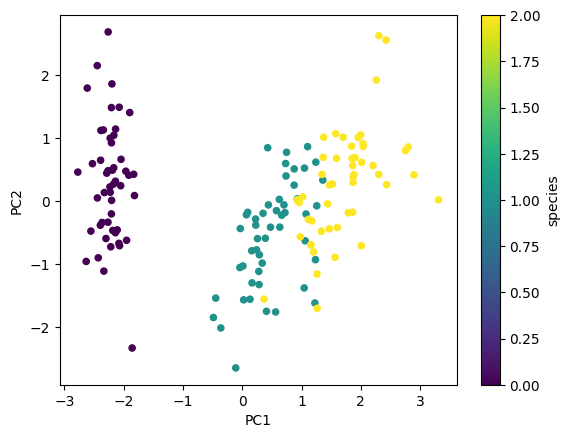

In [ ]:
new_df.plot(kind='scatter', x='PC1', y='PC2', c='species', cmap='viridis')

##Training the Data for the model

**I will be using K-Mean Clustering Alogrithm for predicting. Lets code fusther....**

###First we will be appling K-Mean Algorithm on the original data of iris dataset.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((135, 4), (15, 4), (135,), (15,))

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train)

KMeans(n_clusters=3, random_state=42)

In [ ]:
y_pred = kmeans.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.4

We just got the accuracy score of 40%

###Now we will be appling K-Mean Algorithm on the data after appling PCA.

In [ ]:
X_train_PC, X_test_PC, y_train_PC, y_test_PC = train_test_split(X_PC, y_PC, test_size=0.1, random_state=42)

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train_PC)

KMeans(n_clusters=3, random_state=42)

In [ ]:
y_pred_PC = kmeans.predict(X_test_PC)
accuracy_score(y_test_PC, y_pred_PC)

0.9333333333333333

Here we got the accuracy score of 93%

Text(0.5, 1.0, 'K-Means Clustering')

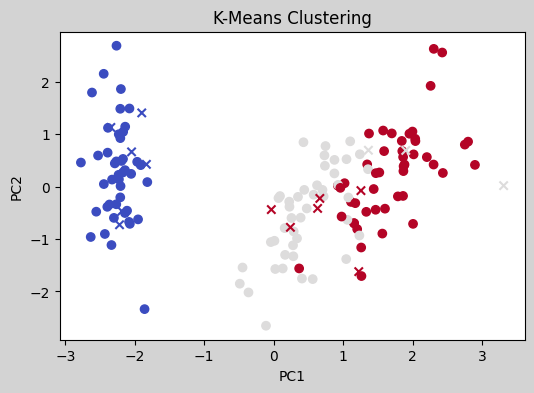

In [ ]:
plt.figure(figsize=(6, 4))
plt.gcf().set_facecolor('lightgrey')
plt.scatter(X_train_PC['PC1'], X_train_PC['PC2'], c=y_train, cmap='coolwarm', marker='o', label='Training Data')
plt.scatter(X_test_PC['PC1'], X_test_PC['PC2'], c=y_pred, cmap='coolwarm', marker='x', label='Testing Data')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-Means Clustering')